In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('BC.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,sex,Degree,Income,Category
0,768805383,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,3,2,0
1,818770008,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2,4,0
2,713982108,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,2,3,0
3,769911858,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,3,4,0
4,709106358,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,5,2,0


In [4]:
feature_scale=[feature for feature in df.columns if feature not in ['Attrition_Flag']]

In [5]:
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [6]:
df2=pd.concat([df['Attrition_Flag'].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],axis=1)

In [7]:
df2.head()

,Attrition_Flag,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,sex,Degree,Income,Category
0,1,0.504929,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,1.0,0.500000,0.4,0.0
1,1,0.920398,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.0,0.333333,0.8,0.0
2,1,0.049060,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,1.0,0.333333,0.6,0.0
3,1,0.514130,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.0,0.500000,0.8,0.0
4,1,0.008517,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,1.0,0.833333,0.4,0.0


# feature selection

In [8]:
from sklearn.tree import ExtraTreeClassifier

In [9]:
x=df.drop('Attrition_Flag',axis=1)
y=df['Attrition_Flag']

In [10]:
x.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,sex,Degree,Income,Category
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,3,2,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2,4,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,2,3,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,3,4,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,5,2,0


In [11]:
reg=ExtraTreeClassifier()
reg.fit(x,y)

ExtraTreeClassifier()

In [12]:
print(reg.feature_importances_)

[0.03269477 0.02631922 0.02500472 0.03240672 0.07823734 0.05005512
 0.03853963 0.02854483 0.11537572 0.03373799 0.03926177 0.13618738
 0.18015962 0.07539932 0.04442276 0.01592672 0.02011591 0.02176775
 0.0058427 ]


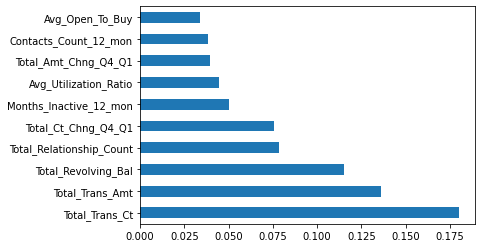

In [13]:
import matplotlib.pyplot as plt
rk=pd.Series(reg.feature_importances_,index=x.columns)
rk.nlargest(10).plot(kind='barh')
plt.show()

In [14]:
d=['Credit_Limit','Customer_Age','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Total_Trans_Ct','Total_Revolving_Bal','Total_Trans_Amt']

In [15]:
x1=df[d]

In [16]:
x1.head()

,Credit_Limit,Customer_Age,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Trans_Ct,Total_Revolving_Bal,Total_Trans_Amt
0,12691.0,45,1,3,1.335,1.625,5,42,777,1144
1,8256.0,49,1,2,1.541,3.714,6,33,864,1291
2,3418.0,51,1,0,2.594,2.333,4,20,0,1887
3,3313.0,40,4,1,1.405,2.333,3,20,2517,1171
4,4716.0,40,1,0,2.175,2.500,5,28,0,816


In [17]:
import seaborn as sns

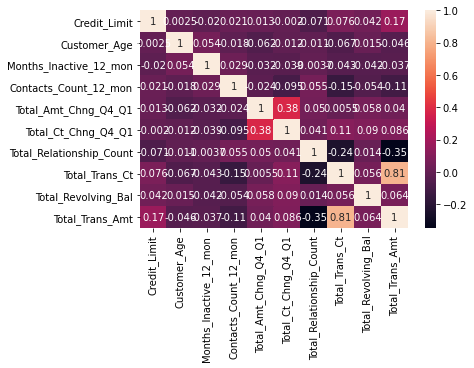

In [18]:
sns.heatmap(x1.corr(),annot=True)

In [19]:
threshould=0.8
def corr(df,threshould):
    col_corr=set()
    col_matrix=df.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>threshould:
                colname=col_matrix.columns[j]
                col_corr.add(colname)
    return col_corr
corr(x1,threshould)

{'Total_Trans_Ct'}

In [20]:
x1.drop('Total_Trans_Ct',axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
x1.head()

,Credit_Limit,Customer_Age,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt
0,12691.0,45,1,3,1.335,1.625,5,777,1144
1,8256.0,49,1,2,1.541,3.714,6,864,1291
2,3418.0,51,1,0,2.594,2.333,4,0,1887
3,3313.0,40,4,1,1.405,2.333,3,2517,1171
4,4716.0,40,1,0,2.175,2.500,5,0,816


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [24]:
x_train.shape

(7088, 9)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np

In [26]:
pipe=Pipeline([('classifier',RandomForestClassifier())])

In [27]:
grid_param=[
            {'classifier':[DecisionTreeClassifier()],
             'classifier__max_features':['log2','sqrt','auto'],
             'classifier__max_depth':[6,4,20,10,60,100,40,None],
             'classifier__max_leaf_nodes':[10,6,50,25,80,40,30,100,None]
            }]

In [28]:
grid=GridSearchCV(pipe,grid_param,cv=5,n_jobs=-1)

In [29]:
best_model=grid.fit(x_train,y_train)

In [32]:
best_model.score(x_train,y_train)

0.945823927765237

In [33]:
rf=RandomForestClassifier()

In [36]:
param={'n_estimators':[100,400,500,600,1000],'max_features':['log2','auto','sqrt'],'max_depth':[6,10,15,20,25,60,None]}
RF=GridSearchCV(rf,param,cv=5,n_jobs=-1)
RF.fit(x_train,y_train)
pred_r=RF.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
print(accuracy_score(y_test,pred_r))
print(classification_report(y_test,pred_r))
print(confusion_matrix(y_test,pred_r))

0.9519578808818691
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       496
           1       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.93      0.89      0.91      3039
weighted avg       0.95      0.95      0.95      3039

[[ 390  106]
 [  40 2503]]


In [39]:
y_train.value_counts()

1    5957
0    1131
Name: Attrition_Flag, dtype: int64

In [40]:
ad=AdaBoostClassifier()
param={'n_estimators':[100,200,400,600,800,1000],'learning_rate':[0.01,0.06,0.08,0.8,0.6,0.4,1.0]}
AD=GridSearchCV(ad,param,cv=5,n_jobs=-1)
AD.fit(x_train,y_train)
pred_a=AD.predict(x_test)

In [41]:
print(accuracy_score(y_test,pred_a))
print(classification_report(y_test,pred_a))
print(confusion_matrix(y_test,pred_a))

0.9282658769332017
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       496
           1       0.94      0.98      0.96      2543

    accuracy                           0.93      3039
   macro avg       0.89      0.83      0.86      3039
weighted avg       0.93      0.93      0.93      3039

[[ 340  156]
 [  62 2481]]


In [43]:
gb=GradientBoostingClassifier()
param={'n_estimators':[100,200,400,500,800,1000],'learning_rate':[0.01,0.06,0.08,0.8,0.6,0.4,1.0],'max_features':['log2','auto','sqrt']}
GB=GridSearchCV(gb,param,cv=5,n_jobs=-1)
GB.fit(x_train,y_train)
pred_g=GB.predict(x_test)

In [44]:
print(accuracy_score(y_test,pred_g))
print(classification_report(y_test,pred_g))
print(confusion_matrix(y_test,pred_g))

0.9555774925962488
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       496
           1       0.97      0.98      0.97      2543

    accuracy                           0.96      3039
   macro avg       0.93      0.91      0.92      3039
weighted avg       0.95      0.96      0.96      3039

[[ 416   80]
 [  55 2488]]


In [45]:
xg=XGBClassifier()
param={'n_estimators':[100,200,500,800,1000],'learning_rate':[0.01,0.02,0.06,0.4,0.6,0.8]}
XG=GridSearchCV(xg,param,cv=5,n_jobs=-1)
XG.fit(x_train,y_train)
pred_x=XG.predict(x_test)

In [46]:
print(accuracy_score(y_test,pred_x))
print(classification_report(y_test,pred_x))
print(confusion_matrix(y_test,pred_x))

0.9529450477130635
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       496
           1       0.97      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.92      0.90      0.91      3039
weighted avg       0.95      0.95      0.95      3039

[[ 412   84]
 [  59 2484]]


In [47]:
from sklearn.neighbors import KNeighborsClassifier

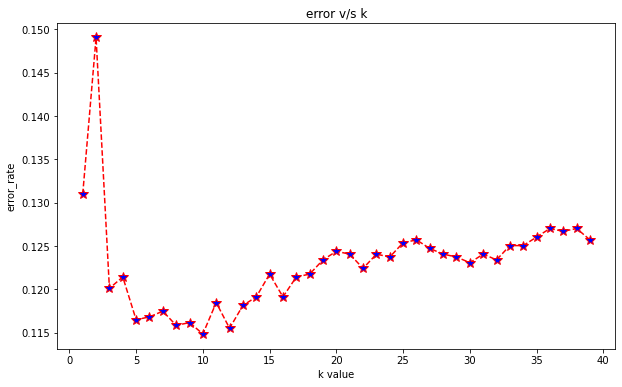

In [50]:
error_rate=[]
for i in range(1,40):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train,y_train)
    pred_k=k.predict(x_test)
    error_rate.append(np.mean(pred_k!=y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle='dashed',marker='*',color='red',markerfacecolor='blue',markersize=10)
plt.title('error v/s k')
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.show()    

In [53]:
k=KNeighborsClassifier(n_neighbors=5)
k.fit(x_train,y_train)
pred_k=k.predict(x_test)

In [54]:
print(accuracy_score(y_test,pred_k))
print(classification_report(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))

0.8835143139190523
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       496
           1       0.91      0.95      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.80      0.74      0.77      3039
weighted avg       0.88      0.88      0.88      3039

[[ 265  231]
 [ 123 2420]]


In [ ]:
# here we see gradient boosting do good job in this case